<a href="https://colab.research.google.com/github/K2FA/PCVK_Genap_2023/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Importing Library
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# 2

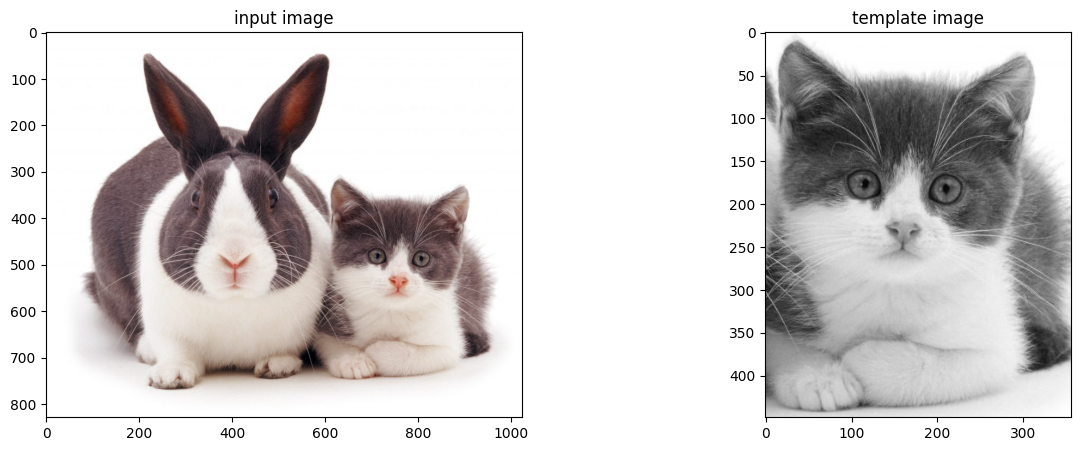

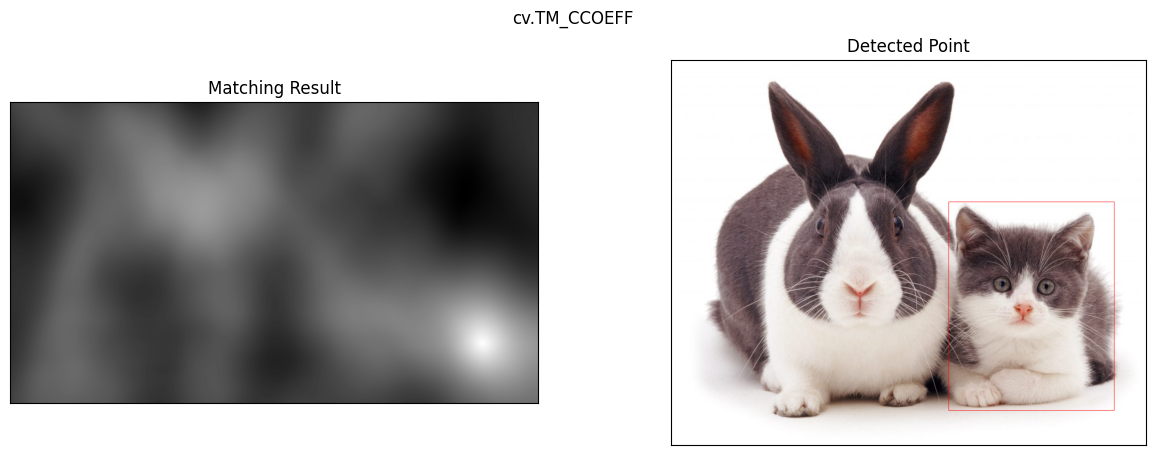

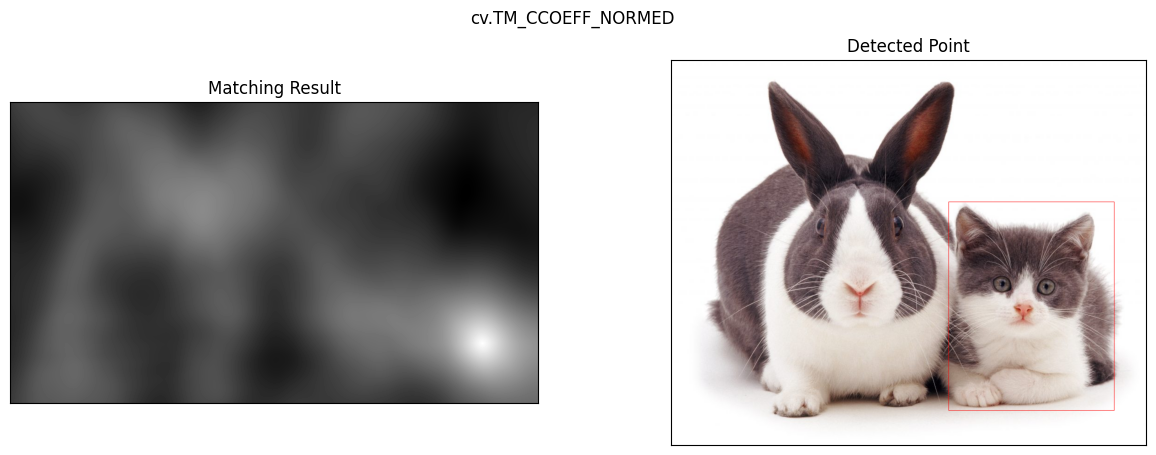

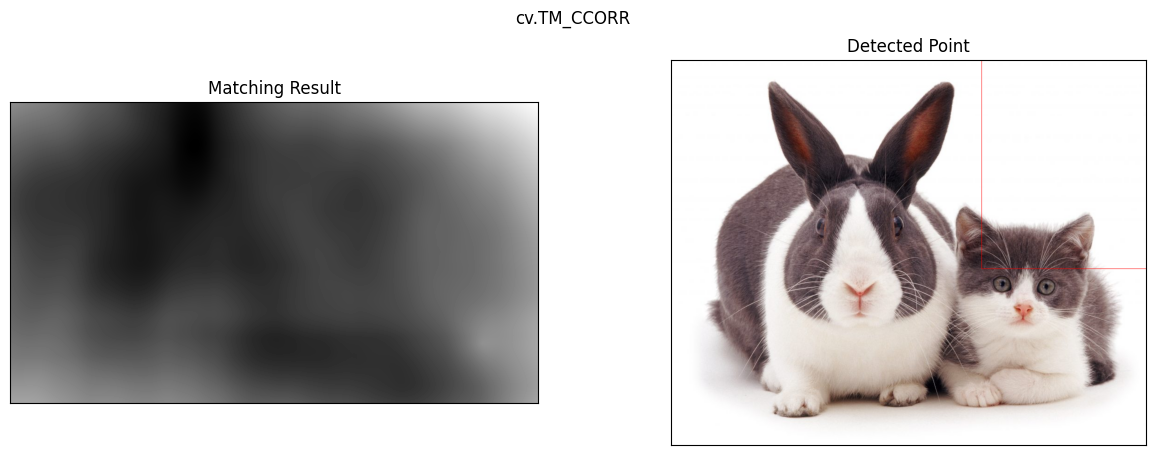

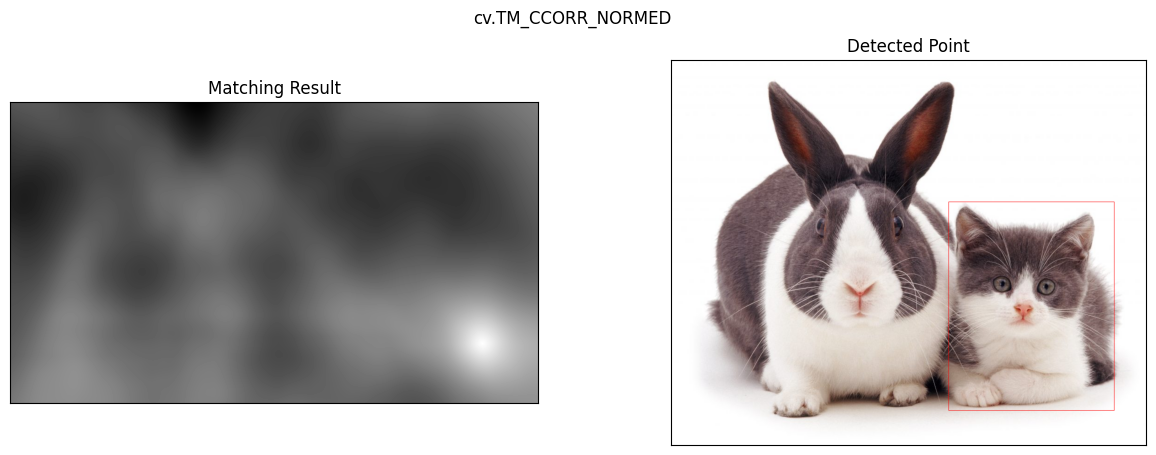

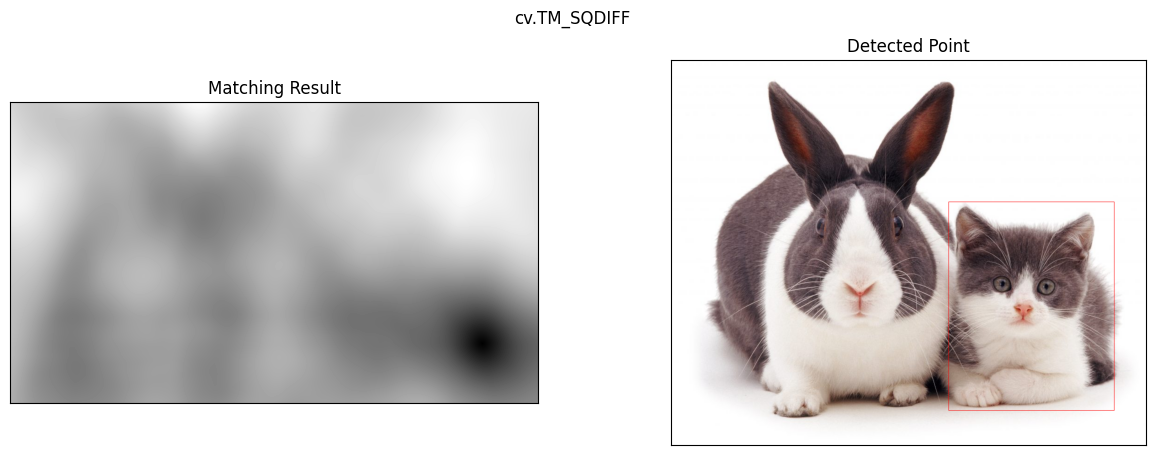

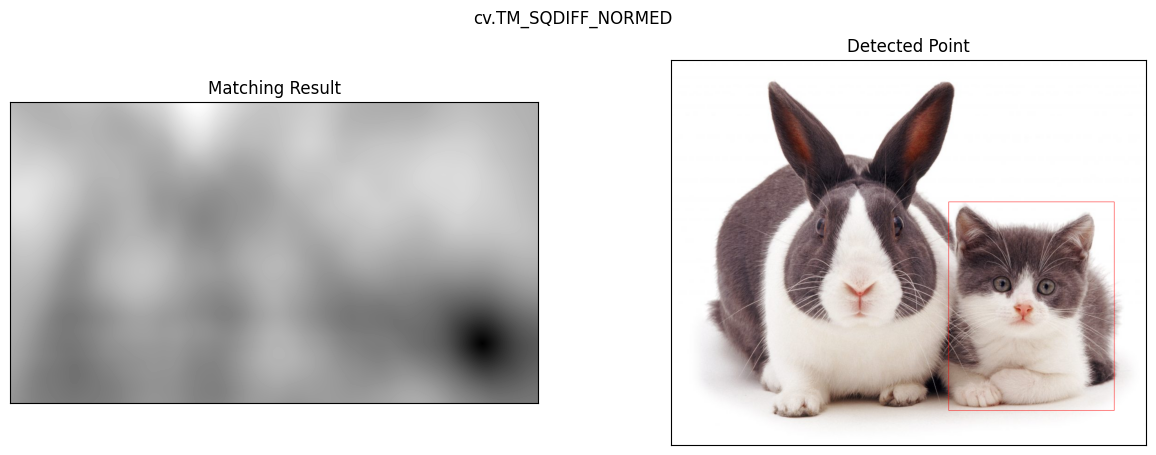

In [51]:
img_cat_bunnies = cv.imread('/content/drive/MyDrive/PCVK/11/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img_cat_bunnies,cv.COLOR_BGR2GRAY)
img_cat_bunnies2 = img_cat_bunnies.copy()

template = cv.imread('/content/drive/MyDrive/PCVK/11/cat2_templatejpg.jpg', 0)

w, h = template.shape[:: -1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(img_cat_bunnies2, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All Method
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
  img = img_cat_bunnies2.copy()
  method = eval(meth)

  # Apply template Matching
  res = cv.matchTemplate(img_gray,template,method)
  min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

  # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
  if(method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]):
    top_left = min_loc
  else :
    top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)

  cv.rectangle(img,top_left,bottom_right, (0,0,255))

  plt.figure(figsize= (15,5))
  plt.subplot(121),plt.imshow(res, cmap = 'gray')
  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
  plt.suptitle(meth)
  plt.show()

# 3

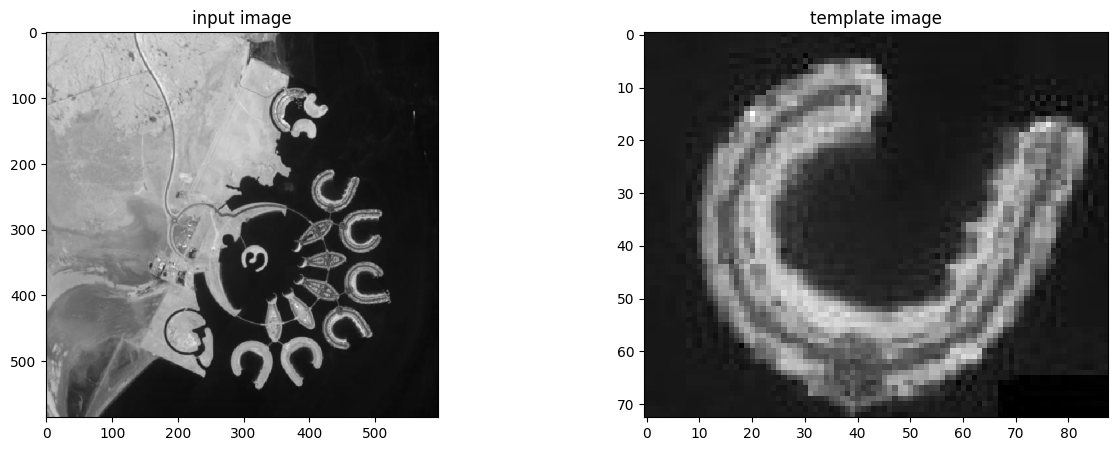

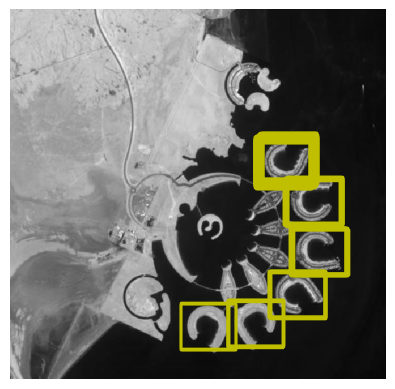

In [77]:
from skimage.io import imread
from skimage.feature import match_template
from skimage.color import rgb2gray

# Load the input image and template
image = rgb2gray(imread('/content/drive/MyDrive/PCVK/11/bahrain.jpg'))
template = rgb2gray(imread('/content/drive/MyDrive/PCVK/11/bahrain-template.jpg'))

# mencari kemiripan antara gambar input dengan gambar template menggunakan fungsi match_template()
result = match_template(image, template)

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) 
axarr[0].imshow(image,cmap=plt.cm.gray), axarr[0].set_title("input image") 
axarr[1].imshow(template,cmap=plt.cm.gray), axarr[1].set_title("template image")

threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='y', facecolor='none')
    ax.add_patch(rect)
plt.show()

# 4

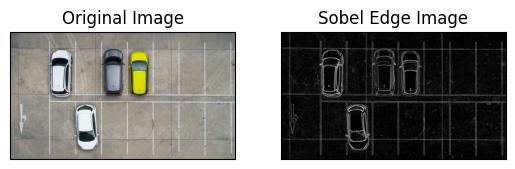

In [68]:
img_car = cv.imread('/content/drive/MyDrive/PCVK/11/car-park.jpg')
img_gray = cv.cvtColor(img_car,cv.COLOR_BGR2GRAY)
img_blur = cv.GaussianBlur(img_gray,(3,3),0)

# Sobel Edge Detection
sobelx = cv.Sobel(img_blur, cv.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
sobely = cv.Sobel(img_blur, cv.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy = cv.addWeighted(cv.convertScaleAbs(sobelx), 0.5, cv.convertScaleAbs(sobely), 0.5, 0)

plt.subplot(121),plt.imshow(cv.cvtColor(img_car,cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sobelxy, cmap = 'gray')
plt.title('Sobel Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

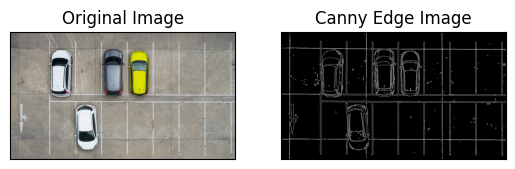

In [59]:
edges = cv.Canny(img_car,100,200)

plt.subplot(121),plt.imshow(cv.cvtColor(img_car,cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

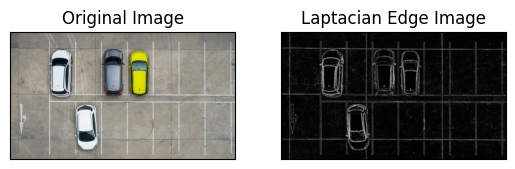

In [74]:
laplacian = cv.Laplacian(img_blur,cv.CV_64F,ksize = 3)

# converting back to uint8
abs_dst = cv.convertScaleAbs(laplacian)

plt.subplot(121),plt.imshow(cv.cvtColor(img_car,cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(abs_dst,cmap = 'gray')
plt.title('Laptacian Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# 5

**Harris Corner Detection**

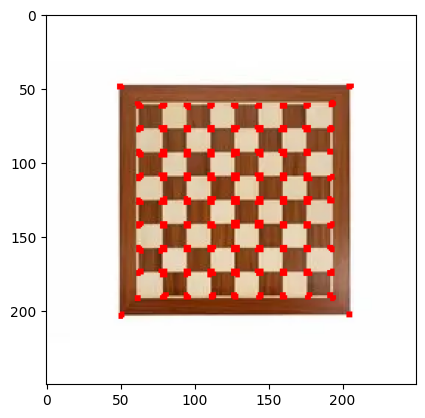

In [118]:
chess = cv.imread('/content/drive/MyDrive/PCVK/11/chess-board.jpg')
chess_gray = cv.cvtColor(chess, cv.COLOR_BGR2GRAY)

gray = np.float32(chess_gray)
harris = cv.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
harris= cv.dilate(harris,None)

# Threshold for an optimal value, it may vary depending on the image.
chess[harris>0.01*harris.max()]=[0,0,255]

# plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(chess, cv.COLOR_BGR2RGB))
plt.show()

**Shi-Tomasi Corner Detection**

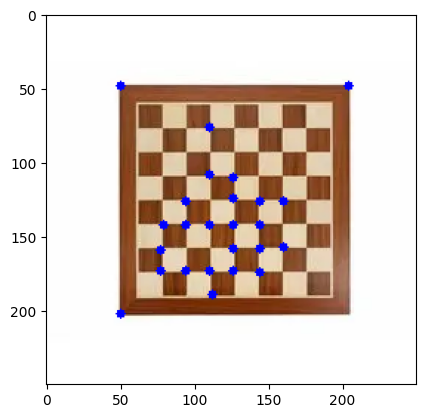

In [120]:
img_chess = cv.imread('/content/drive/MyDrive/PCVK/11/chess-board.jpg')
gray = cv.cvtColor(img_chess, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv.circle(img_chess,(x,y),3,255,-1)

plt.imshow(cv.cvtColor(img_chess, cv.COLOR_BGR2RGB))
plt.show()